In [46]:
import numpy as np
def plotIV(indata, name):
    IV7 = indata[indata.parameter == "DataValue"][["detail","d1"]]
    IV7 = IV7.rename(columns={"detail":"VHV","d1":"IHV"})
    IV7["VHV"] = pd.to_numeric(IV7["VHV"])
    IV7["IHV"] = pd.to_numeric(IV7["IHV"])*(10**9)
    plt.figure(figsize=(12,8))
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (nA)")
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.plot(IV7["VHV"].abs(),IV7["IHV"].abs(),'-ok',label=f"{name}",color="b",)
    plt.legend(fontsize=30)    
    plt.grid(color='grey', linestyle='-', linewidth=2)
    plt.savefig(f"{name}.png",dpi=500)
    plt.show()

def plotIV_ijclab(indata, name):
    dut = pd.read_csv(indata, encoding="latin")
    dut = dut[1:].apply(pd.to_numeric)
    temperature = dut["H"][1]
    humidity = dut["F"][1]
    print ("temp",temperature)
    print ("hum",humidity)
    
    IVDUT = dut[["D(X)","E(Y1)"]]
    IVDUT["Current (A)"] = IVDUT["E(Y1)"]*(-10**9)
    IVDUT["Voltage (V)"] = IVDUT["D(X)"]*-1
    
    plt.figure(figsize=(12,8))
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (nA)")
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.plot(IVDUT["Voltage (V)"].abs(),IVDUT["Current (A)"].abs(),'-ok',label=f"{name}",color="b",)
    #plt.legend(fontsize=30)
    plt.title(f"Module: {name}, T: {temperature} C, HR: {humidity:.2f}%")
    plt.grid(color='grey', linestyle='-', linewidth=2)
    plt.savefig(f"{name}.png",dpi=500)
    plt.show()
    
def plotIV_thick(indata, name):
    dut = pd.read_csv(indata, encoding="latin")
    dut = dut[1:].apply(pd.to_numeric)
    temperature = dut["H"][1]
    humidity = dut["F"][1]
    if np.isnan(temperature):
        temperature = 20
    if np.isnan(humidity):
        humidity = 8
        
    print ("temp",temperature)
    print ("hum",humidity)
    
    IVDUT = dut[["C(Y1)","B(X)"]]
    IVDUT["Current (A)"] = IVDUT["C(Y1)"]*(-10**9)
    IVDUT["Voltage (V)"] = IVDUT["B(X)"]*-1
    
    plt.figure(figsize=(12,8))
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (nA)")
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.plot(IVDUT["Voltage (V)"].abs(),IVDUT["Current (A)"].abs(),'-ok',label=f"{name}",color="b",)
    #plt.legend(fontsize=30)
    plt.title(f"Module: {name}, T: {temperature} C, HR: {humidity:.2f}%")
    plt.grid(color='grey', linestyle='-', linewidth=2)
    plt.savefig(f"{name}.png",dpi=500)
    plt.show()
    
    
def plotIV_CEA(indata, name):
    dut = pd.read_csv(indata, encoding="latin")
    #dut = dut[:2].apply(pd.to_numeric)
    

    temperature = 20
        
    print ("temp",temperature)
    
    IVDUT = dut[["current","voltage"]]
    IVDUT["Current (A)"] = IVDUT["current"]*(-10**9)
    IVDUT["Voltage (V)"] = IVDUT["voltage"]*-1
    
    plt.figure(figsize=(12,8))
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (nA)")
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    plt.plot(IVDUT["Voltage (V)"].abs(),IVDUT["Current (A)"].abs(),'-ok',label=f"{name}",color="b",)
    #plt.legend(fontsize=30)
    plt.title(f"Module: {name}, T: {temperature} C")
    plt.grid(color='grey', linestyle='-', linewidth=2)
    plt.savefig(f"{name}.png",dpi=500)
    plt.show()
    


In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [48]:
paris_dict = {
    "20UPGM20124027":"thickModule7",
"20UPGM20124030":"thickModule4",
"20UPGM20121146":"thickModule5",
"20UPGM20124015":"thickModule8",
"20UPGM20124016":"thickModule6",
"20UPGM20012019":"Paris1",
"20UPGM20024025":"Paris2",
"20UPGM20024036":"Paris3",
"20UPGM20024041":"Paris4",
"20UPGM20021043":"Paris5",
"20UPGM20024132":"Paris6",
"20UPGM20021110":"Paris7",
"20UPGM20021171":"Paris8",
"20UPGM20024044":"Paris9",
"20UPGM20024020":"Paris10",
"20UPGM20024022":"Paris11",
"20UPGM20021148":"Paris12",
"20UPGM20025039":"Paris13",
"20UPGM20025036":"Paris14",
"20UPGM20025034":"Paris15",
"20UPGM20025047":"Paris16",
"20UPGM20025035":"Paris17",
"20UPGM20025045":"Paris18",
"20UPGM20025046":"Paris19"
}

vdepl_dict = {
    "20UPGM20124027":"thickModule7",
"20UPGM20124030":-150,
"20UPGM20121146":-150,
"20UPGM20124015":-150,
"20UPGM20124016":-80,
"20UPGM20012019":-80,
"20UPGM20024025":-65,
"20UPGM20024036":-75,
"20UPGM20024041":0,
"20UPGM20021043":-75,
"20UPGM20024132":-65,
"20UPGM20021110":-65,
"20UPGM20021171":-65,
"20UPGM20024044":-50,
"20UPGM20024020":-65,
"20UPGM20024022":-68,
"20UPGM20021148":-82,
"20UPGM20025039":-65,
"20UPGM20025036":-65,
"20UPGM20025034":-65,
"20UPGM20025047":-65,
"20UPGM20025035":-50,
"20UPGM20025045":-68,
"20UPGM20025046":-65
}

module_dict={"20UPGM20012019":"3377-7-Q4",
"20UPGM20024025":"3378-9-Q3",
"20UPGM20024036":"3378-9-Q5",
"20UPGM20024041":"3377-9-Q1",
"20UPGM20021043":"3378-2-Q3",
"20UPGM20024132":"3378-2-Q4",
"20UPGM20021110":"3378-2-Q2",
"20UPGM20021171":"3378-9-Q2",
"20UPGM20024044":"3377-7-Q3",
"20UPGM20024020":"3377-9-Q2",
"20UPGM20024022":"3377-9-Q4",
"20UPGM20021148":"3377-6-Q5",
"20UPGM20025039":"3378-1-Q2",
"20UPGM20025036":"3378-1-Q3",
"20UPGM20025034":"3378-1-Q5",
"20UPGM20025047":"3378-1-Q4",
"20UPGM20025035":"3377-7-Q2",
"20UPGM20025045":"3377-9-Q3",
"20UPGM20025046":"3378-2-Q1",
"20UPGM20124027":"bare_module_7",
"20UPGM20124030":"bare_module_4",
"20UPGM20121146":"bare_module_5",
"20UPGM20124015":"bare_module_8",
"20UPGM20124016":"bare_module_6"}

informal_dict={"20UPGM20012019":"3377-7-Q4",
"20UPGM20024025":"3378-9-Q3",
"20UPGM20024036":"3378-9-Q5",
"20UPGM20024041":"3377-9-Q1",
"20UPGM20021043":"3378-2-Q3",
"20UPGM20024132":"3378-2-Q4",
"20UPGM20021110":"3378-2-Q2",
"20UPGM20021171":"3378-9-Q2",
"20UPGM20024044":"3377-7-Q3",
"20UPGM20024020":"3377-9-Q2",
"20UPGM20024022":"3377-9-Q4",
"20UPGM20021148":"3377-6-Q5",
"20UPGM20025039":"3378-1-Q2",
"20UPGM20025036":"3378-1-Q3",
"20UPGM20025034":"3378-1-Q5",
"20UPGM20025047":"3378-1-Q4",
"20UPGM20025035":"3377-7-Q2",
"20UPGM20025045":"3377-9-Q3",
"20UPGM20025046":"3378-2-Q1",
"20UPGM20124027":"bare_module_7",
"20UPGM20124030":"bare_module_4",
"20UPGM20121146":"bare_module_5",
"20UPGM20124015":"bare_module_8",
"20UPGM20124016":"bare_module_6"}


dict_lpnhe = {'3377-9-Q3': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q3(4) _ 4_28_2021 11_22_18 AM].csv',
 '3378-1-Q2': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q2(1) _ 6_15_2021 10_19_58 AM].csv',
 '3378-9-Q3': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q3(6) _ 4_28_2021 11_33_48 AM].csv',
 '3377-9-Q2': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q2(3) _ 4_28_2021 11_16_40 AM].csv',
 '3378-1-Q5': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q5(5) _ 6_15_2021 10_48_22 AM].csv',
 '3377-9-Q4': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q4(5) _ 4_28_2021 11_27_12 AM].csv',
 '3378-1-Q4': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q4(3) _ 6_15_2021 10_39_35 AM].csv',
 '3377-7-Q4': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-7-Q4(10) _ 4_28_2021 11_53_12 AM].csv',
 '3377-9-Q1': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q1(1) _ 4_28_2021 11_06_10 AM].csv',
 '3377-6-Q5': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-6-Q5(1) _ 6_15_2021 10_59_06 AM].csv',
 '3378-9-Q5': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q5(7) _ 4_28_2021 11_37_30 AM].csv',
 '3377-7-Q2': 'Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-7-Q2(1) _ 6_15_2021 11_07_11 AM].csv'}

dict_ijclab = {'3378-9-Q2': 'IJCLab_Measurements/ThinModules/3378-9-Q2_smu1P15_smu2BS_m1_auto_20210506.csv',
 '3377-6-Q5': 'IJCLab_Measurements/ThinModules/3377-6-Q5_smu1P15_smu2BS_m1_auto_step05V_20210531.csv',
 '3378-2-Q4': 'IJCLab_Measurements/ThinModules/3378-2-Q4_smu1P15_smu2BS_m1_1uA_20210519.csv',
 '3378-2-Q2': 'IJCLab_Measurements/ThinModules/3378-2-Q2_smu1P15_smu2BS_m1_1uA_20210518.csv',
 '3378-2-Q1': 'IJCLab_Measurements/ThinModules/3378-2-Q1_smu1P15_smu2BS_m1_auto_step1V_20210519.csv',
 '3377-7-Q2': 'IJCLab_Measurements/ThinModules/3377-7-Q2_smu1P15_smu2BS_m1_auto_step05V_20210531.csv',
 '3378-1-Q4': 'IJCLab_Measurements/ThinModules/3378-1-Q4_smu1P15_smu2BS_m2_1uA_20210602.csv',
 '3378-2-Q3': 'IJCLab_Measurements/ThinModules/3378-2-Q3_smu1P15_smu2BS_m1_1uA_20210518.csv',
 '3377-7-Q3': 'IJCLab_Measurements/ThinModules/3377-7-Q3_smu1P15_smu2BS_m2_1uA_20210511.csv',
 '3378-1-Q3': 'IJCLab_Measurements/ThinModules/3378-1-Q3_smu1P15_smu2BS_m1_auto_step1V_20210602.csv',
 '3378-1-Q5': 'IJCLab_Measurements/ThinModules/3378-1-Q5_smu1P15_smu2BS_m1_1uA_20210602.csv',
 '3378-1-Q2': 'IJCLab_Measurements/ThinModules/3378-1-Q2_smu1P15_smu2BS_m1_1uA_midPad_20210602.csv'}
dict_thick_mod = {
 'bare_module_4': 'IJCLab_Measurements/ThickModules/ijclab_bare_module_4_20210323_m1.csv',
 'bare_module_5': 'IJCLab_Measurements/ThickModules/ijclab_bare_module_5_20210326.csv',
 'bare_module_6': 'IJCLab_Measurements/ThickModules/ijclab_bare_module_6_20210326.csv',
 'bare_module_8': 'IJCLab_Measurements/ThickModules/ijclab_bare_module_8_20210329.csv'}

In [49]:
    
def plotIV_combined(indata_before, indata_after, module_type ,name,qc):
    before_temperature = 0
    if module_type == "lpnhe":
        module_data = pd.read_csv(f"./{indata_before}", encoding="latin", names=["parameter","detail","d0","d1","d2","d3"])

        IV_before = module_data[module_data.parameter == "DataValue"][["detail","d1"]]
        IV_before = IV_before.rename(columns={"detail":"VHV","d1":"IHV"})
        IV_before["VHV"] = pd.to_numeric(IV_before["VHV"])
        IV_before["IHV"] = pd.to_numeric(IV_before["IHV"])
        current_tab = "IHV"
        voltage_tab = "VHV"
    elif  module_type == "thick":
        IV_before = pd.read_csv(indata_before, encoding="latin")
        IV_before = IV_before[1:].apply(pd.to_numeric)
        current_tab = "C(Y1)"
        voltage_tab = "B(X)"
        before_temperature = IV_before["H"][1]

    else:
        IV_before = pd.read_csv(indata_before, encoding="latin")
        IV_before = IV_before[1:].apply(pd.to_numeric)
        current_tab = "E(Y1)"
        voltage_tab = "D(X)"
        before_temperature = IV_before["H"][1]

        
    after = pd.read_csv(indata_after, encoding="latin")

    if np.isnan(before_temperature) or before_temperature == 0:
        before_temperature = 20
    
    after_temperature = 20
        
    print ("temp",before_temperature)
    
    IV_before = IV_before[[current_tab,voltage_tab]]
    IV_before["Current (A)"] = IV_before[current_tab]*(-10**9)
    IV_before["Voltage (V)"] = IV_before[voltage_tab]*-1
    
    IV_after = after[["current","voltage"]]
    IV_after["Current (A)"] = IV_after["current"]*(-10**9)
    IV_after["Voltage (V)"] = IV_after["voltage"]*-1
    
    
    
    plt.figure(figsize=(12,8))
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (nA)")
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
    
    #ymax = (abs(IV_after["Current (A)"][40]))
    
    #plt.ylim([0, 20000])
    plt.xlim([0, 200])

    plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
    plt.plot(IV_before["Voltage (V)"].abs(),IV_before["Current (A)"].abs(),'-ok',label=f"Before assembly,T = {before_temperature}",color="b",)
    plt.legend(fontsize=30)

    plt.title(f"Module: {name} ({paris_dict[name]}), Vdepl = {vdepl_dict[name]} V")
    plt.grid(color='grey', linestyle='-', linewidth=2)
    plt.savefig(f"{name}{qc}.png",dpi=500)
    plt.show()

CEA_tests/20UPGM20024036/Test_SensorIV.csv
afterlife: 3378-9-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q5(7) _ 4_28_2021 11_37_30 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

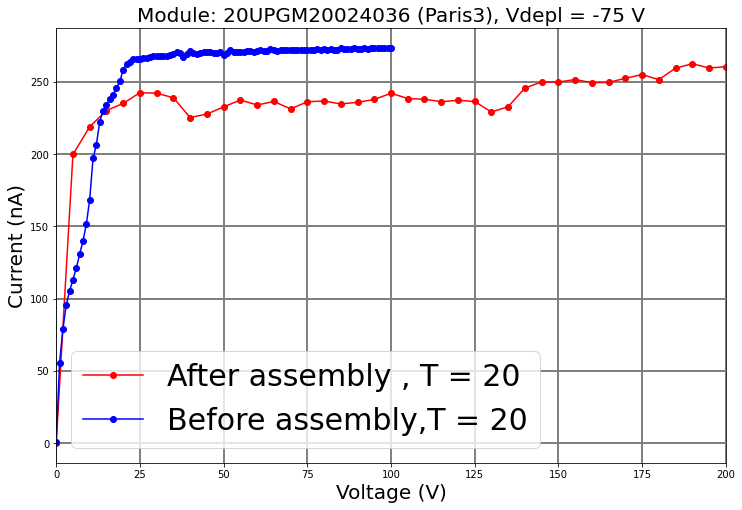

CEA_tests/20UPGM20021110/Test_SensorIV.csv
afterlife: 3378-2-Q2
IJCLab_Measurements/ThinModules/3378-2-Q2_smu1P15_smu2BS_m1_1uA_20210518.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

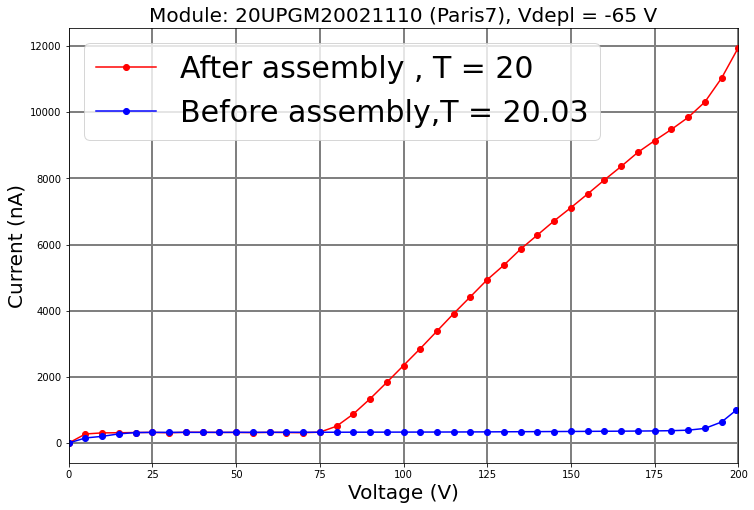

CEA_tests/20UPGM20124030/Test_SensorIV.csv
afterlife: bare_module_4
IJCLab_Measurements/ThickModules/ijclab_bare_module_4_20210323_m1.csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

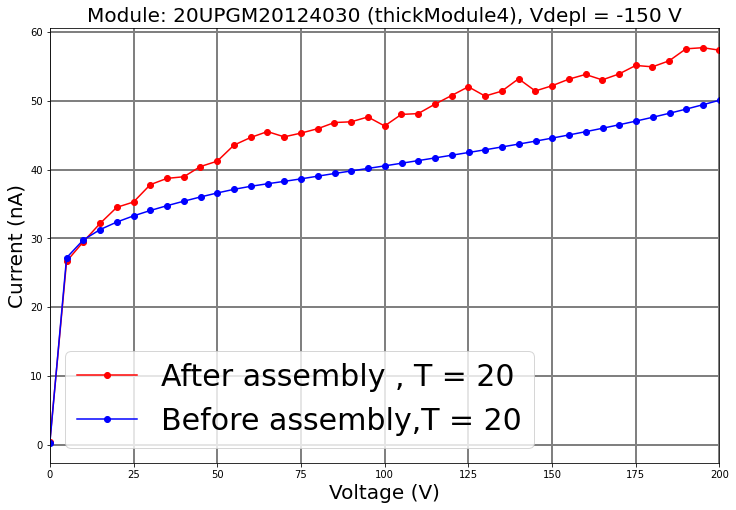

CEA_tests/20UPGM20025039/Test_SensorIV.csv
afterlife: 3378-1-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q2(1) _ 6_15_2021 10_19_58 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

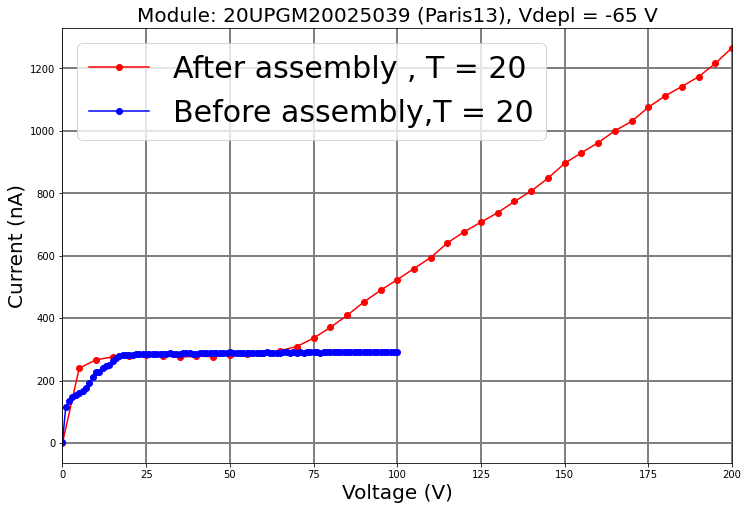

CEA_tests/20UPGM20024132/Test_SensorIV.csv
afterlife: 3378-2-Q4
IJCLab_Measurements/ThinModules/3378-2-Q4_smu1P15_smu2BS_m1_1uA_20210519.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

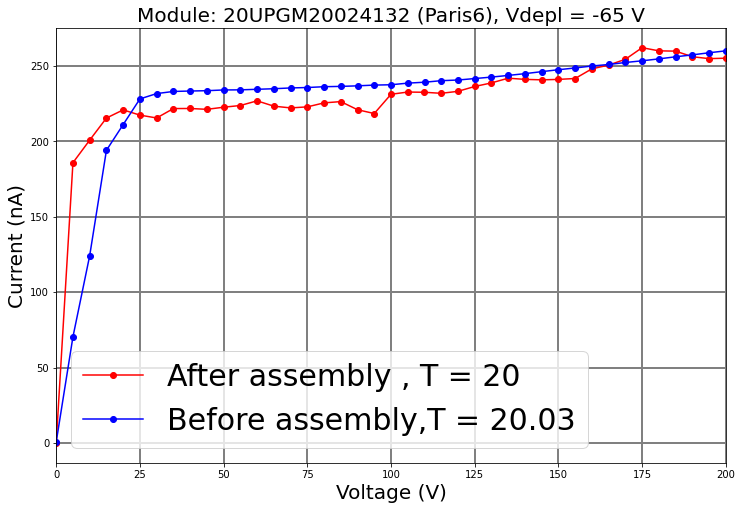

CEA_tests/20UPGM20025047/Test_SensorIV.csv
afterlife: 3378-1-Q4
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q4(3) _ 6_15_2021 10_39_35 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

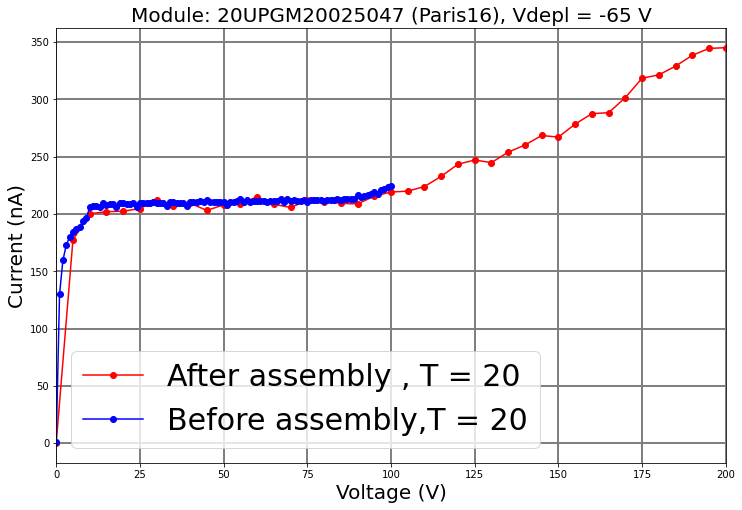

CEA_tests/20UPGM20124015/Test_SensorIV.csv
afterlife: bare_module_8
IJCLab_Measurements/ThickModules/ijclab_bare_module_8_20210329.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

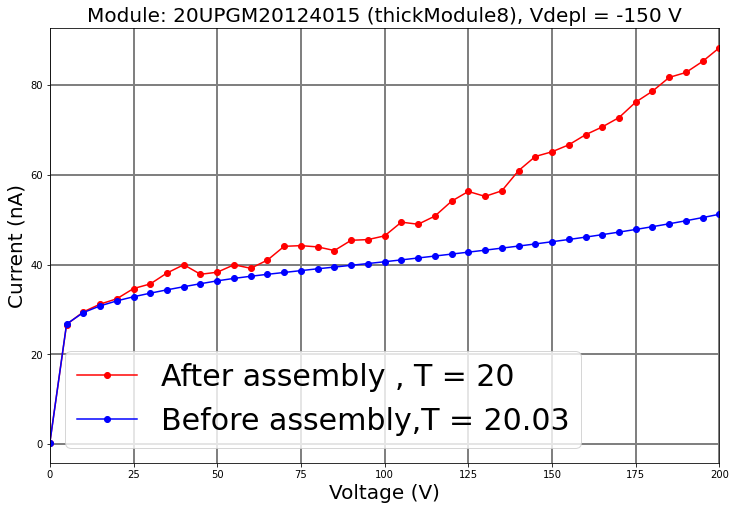

CEA_tests/20UPGM20024025/Test_SensorIV.csv
afterlife: 3378-9-Q3
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q3(6) _ 4_28_2021 11_33_48 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

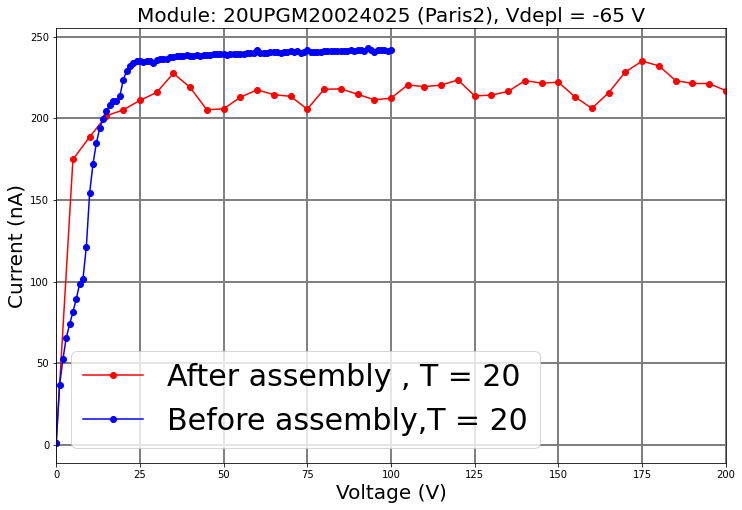

CEA_tests/20UPGM20024022/Test_SensorIV.csv
afterlife: 3377-9-Q4
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q4(5) _ 4_28_2021 11_27_12 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

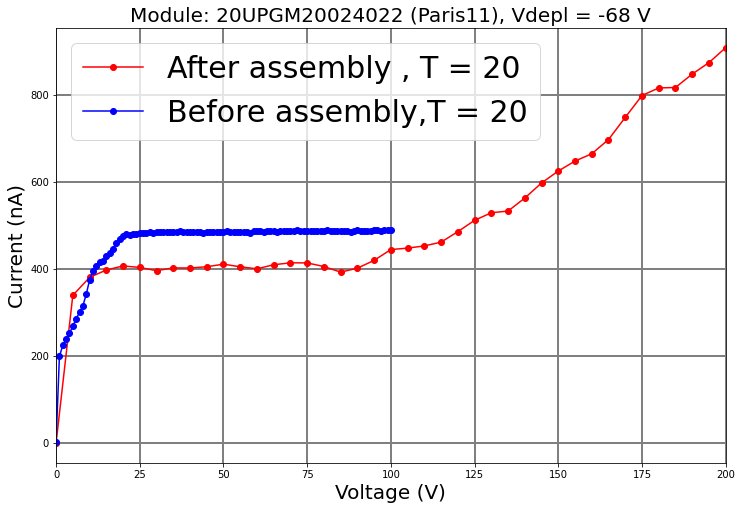

CEA_tests/20UPGM20021148/Test_SensorIV.csv
afterlife: 3377-6-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-6-Q5(1) _ 6_15_2021 10_59_06 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

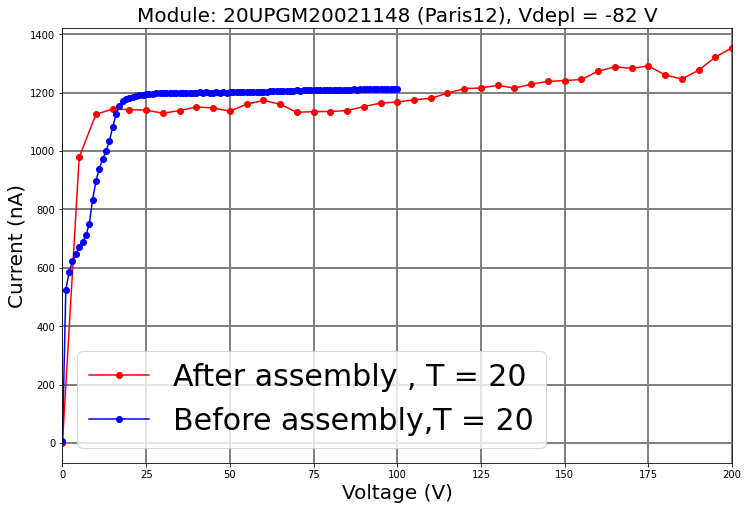

CEA_tests/20UPGM20021171/Test_SensorIV.csv
afterlife: 3378-9-Q2
IJCLab_Measurements/ThinModules/3378-9-Q2_smu1P15_smu2BS_m1_auto_20210506.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

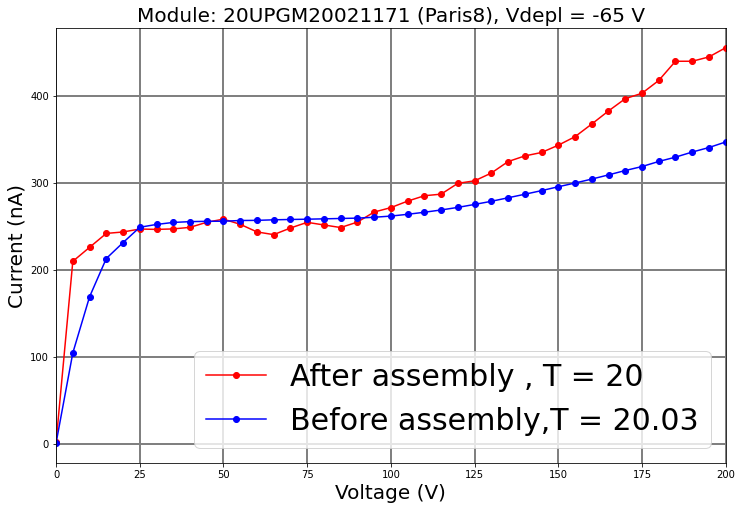

CEA_tests/20UPGM20025034/Test_SensorIV.csv
afterlife: 3378-1-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q5(5) _ 6_15_2021 10_48_22 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

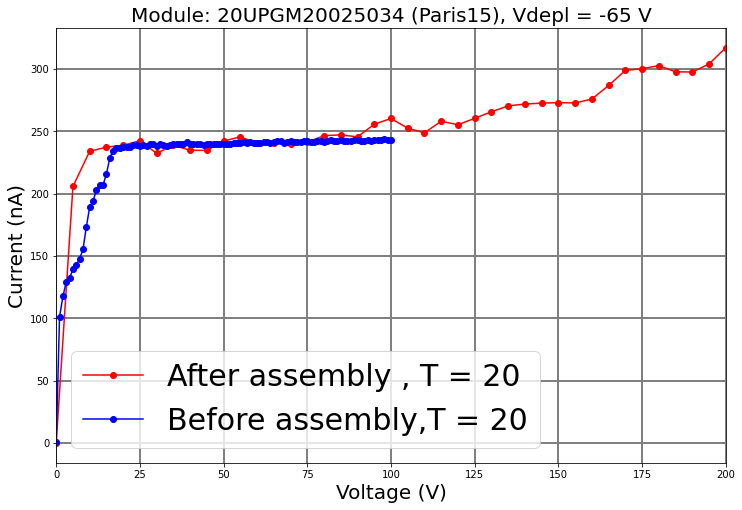

CEA_tests/20UPGM20121146/Test_SensorIV.csv
afterlife: bare_module_5
IJCLab_Measurements/ThickModules/ijclab_bare_module_5_20210326.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

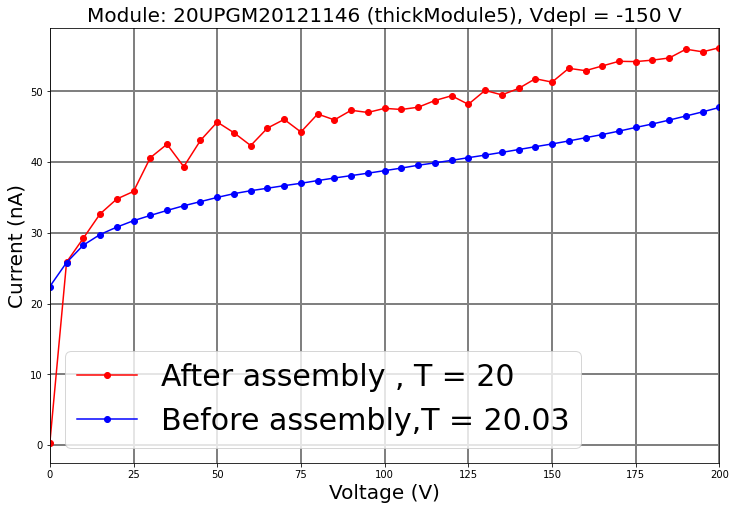

CEA_tests/20UPGM20025035/Test_SensorIV.csv
afterlife: 3377-7-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-7-Q2(1) _ 6_15_2021 11_07_11 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

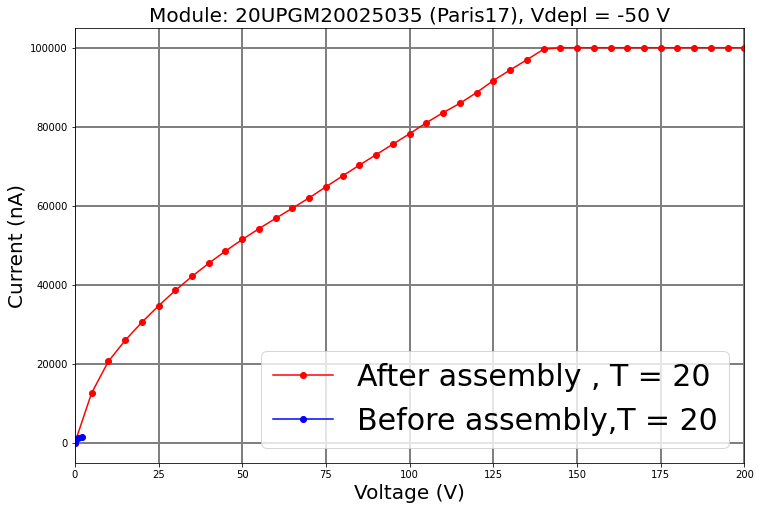

CEA_tests/20UPGM20025045/Test_SensorIV.csv
afterlife: 3377-9-Q3
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q3(4) _ 4_28_2021 11_22_18 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

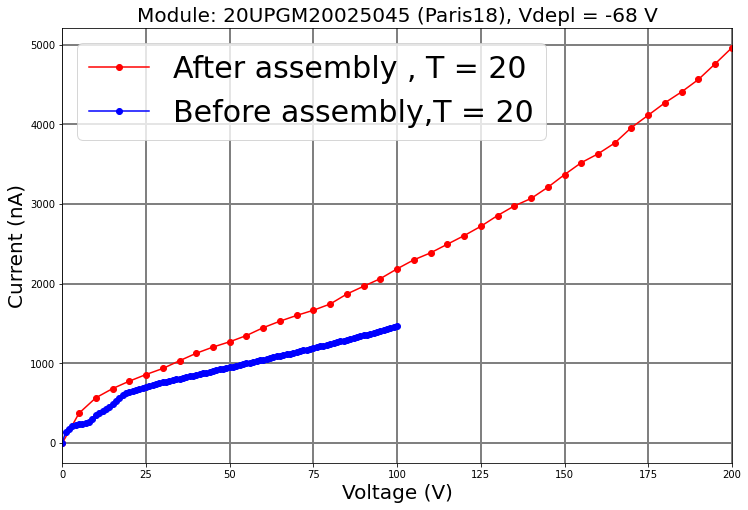

CEA_tests/20UPGM20124016/Test_SensorIV.csv
afterlife: bare_module_6
IJCLab_Measurements/ThickModules/ijclab_bare_module_6_20210326.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

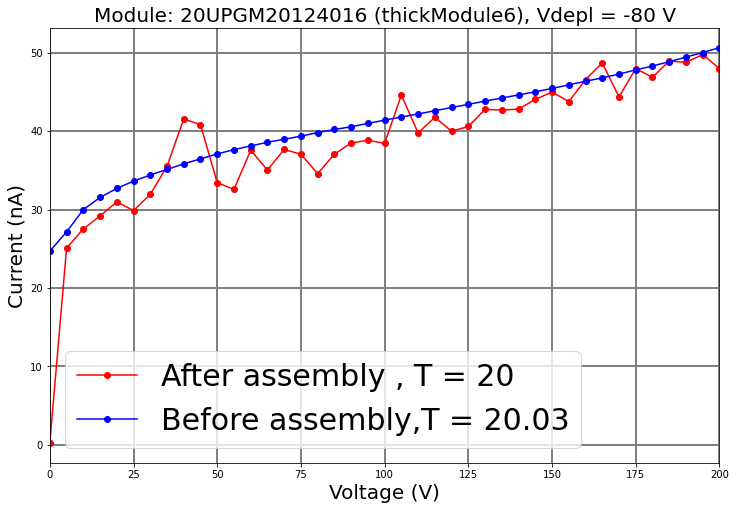

CEA_tests/20UPGM20021043/Test_SensorIV.csv
afterlife: 3378-2-Q3
IJCLab_Measurements/ThinModules/3378-2-Q3_smu1P15_smu2BS_m1_1uA_20210518.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_before["Voltage (V)"].abs(),IV_before["Current (A)"].abs(),'-ok',label=f"Before assembly,T = {before_temperature}",color="b",)


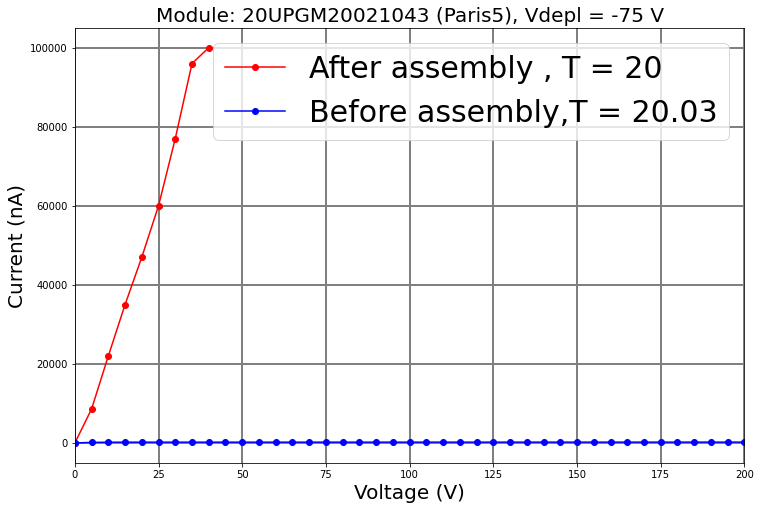

CEA_tests/20UPGM20024020/Test_SensorIV.csv
afterlife: 3377-9-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q2(3) _ 4_28_2021 11_16_40 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

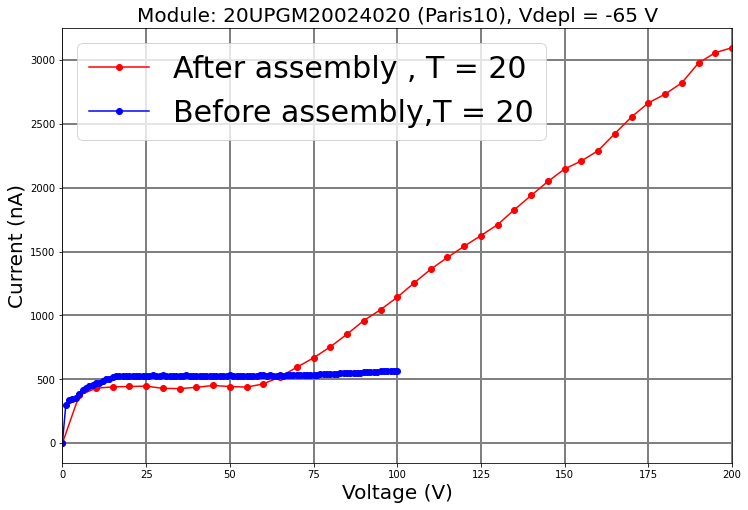

CEA_tests/20UPGM20024044/Test_SensorIV.csv
afterlife: 3377-7-Q3
IJCLab_Measurements/ThinModules/3377-7-Q3_smu1P15_smu2BS_m2_1uA_20210511.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

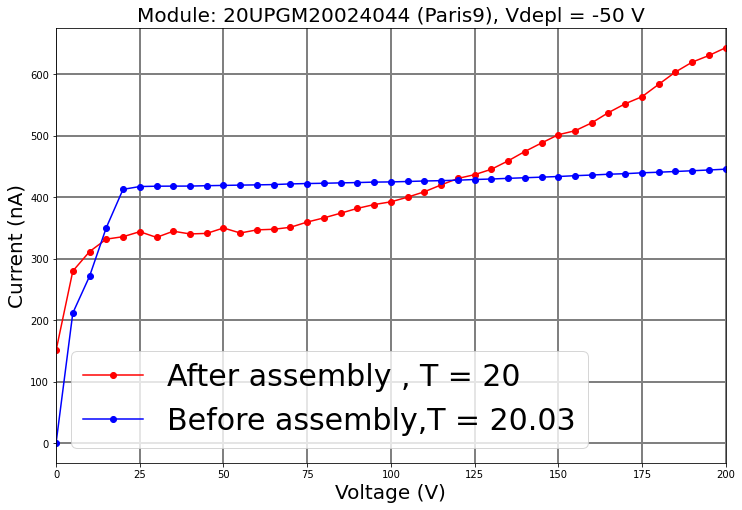

In [50]:
for dirs in os.listdir("CEA_tests"):
    if "UPGM" in dirs:
  #     if "20UPGM20024025" not in dirs:
  #          continue
        post_assembly = "CEA_tests/"+dirs+"/Test_SensorIV.csv"
        before_assembly = ""
        print (post_assembly)
        print("afterlife:",module_dict[dirs])
        file_type = "ijclab"
   #     plotIV_CEA(post_assembly,module_dict[dirs])

        if module_dict[dirs] in dict_lpnhe:
            print (dict_lpnhe[module_dict[dirs]])
            before_assembly = dict_lpnhe[module_dict[dirs]]
            file_type = "lpnhe"
        elif module_dict[dirs] in dict_ijclab:
            file_type = "ijclab"
            before_assembly = dict_ijclab[module_dict[dirs]]
            print (dict_ijclab[module_dict[dirs]])
        elif module_dict[dirs] in dict_thick_mod:
            print (dict_thick_mod[module_dict[dirs]])
            before_assembly = dict_thick_mod[module_dict[dirs]]
            file_type = "thick"
        
        plotIV_combined(before_assembly,post_assembly,file_type,dirs,"")



CEA_tests/20UPGM20024036/Test_SensorIV_qc.csv
afterlife: 3378-9-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q5(7) _ 4_28_2021 11_37_30 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

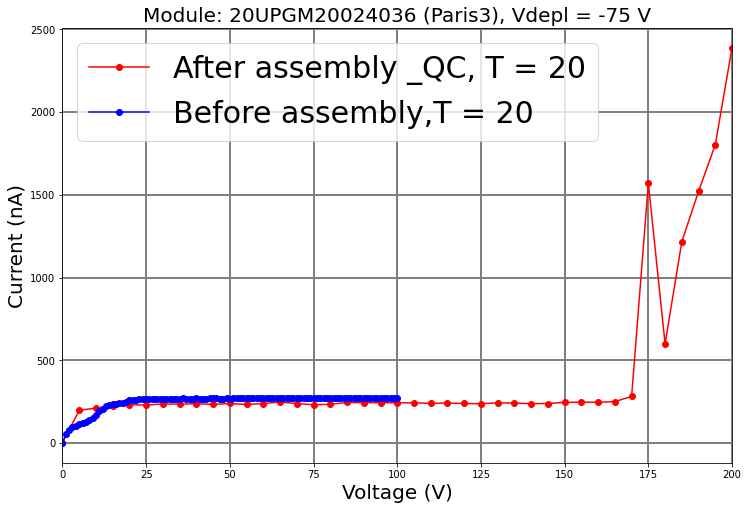

CEA_tests/20UPGM20021110/Test_SensorIV_qc.csv
afterlife: 3378-2-Q2
IJCLab_Measurements/ThinModules/3378-2-Q2_smu1P15_smu2BS_m1_1uA_20210518.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

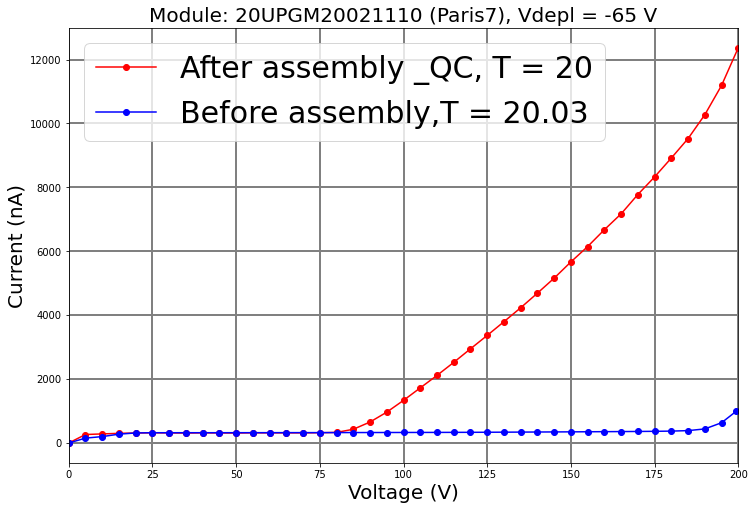

CEA_tests/20UPGM20124030/Test_SensorIV_qc.csv
afterlife: bare_module_4
IJCLab_Measurements/ThickModules/ijclab_bare_module_4_20210323_m1.csv
CEA_tests/20UPGM20025039/Test_SensorIV_qc.csv
afterlife: 3378-1-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q2(1) _ 6_15_2021 10_19_58 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

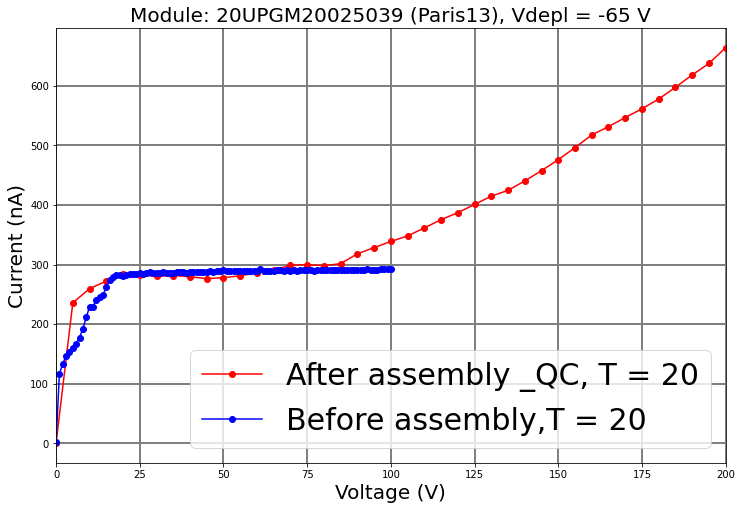

CEA_tests/20UPGM20024132/Test_SensorIV_qc.csv
afterlife: 3378-2-Q4
IJCLab_Measurements/ThinModules/3378-2-Q4_smu1P15_smu2BS_m1_1uA_20210519.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

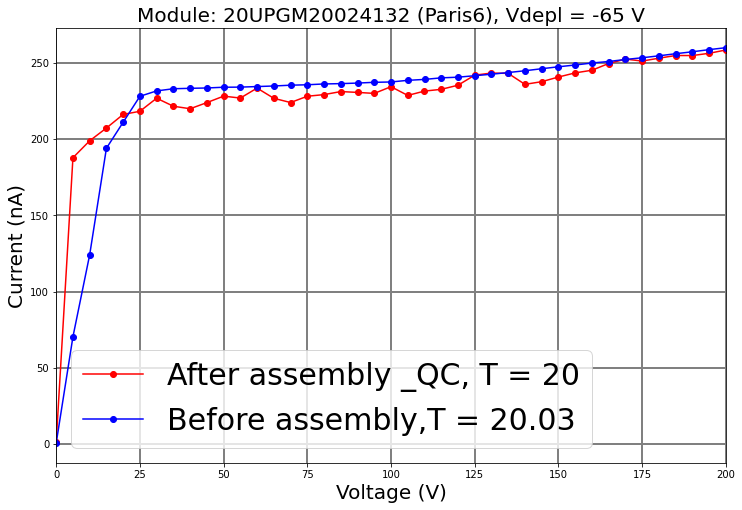

CEA_tests/20UPGM20025047/Test_SensorIV_qc.csv
afterlife: 3378-1-Q4
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q4(3) _ 6_15_2021 10_39_35 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

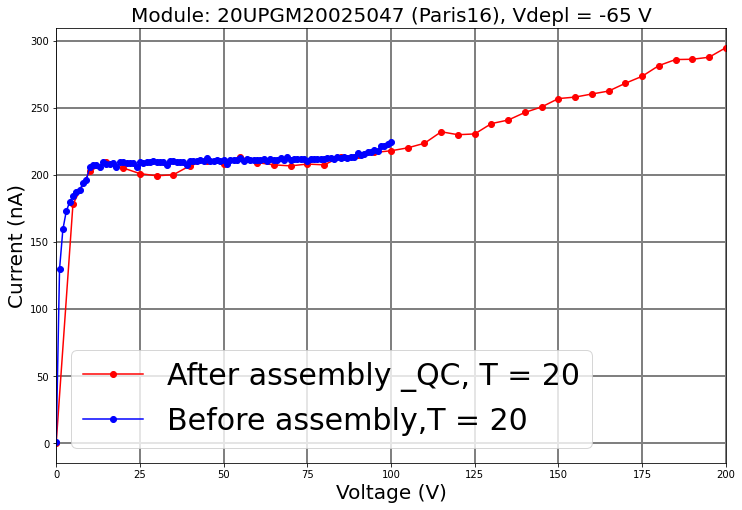

CEA_tests/20UPGM20124015/Test_SensorIV_qc.csv
afterlife: bare_module_8
IJCLab_Measurements/ThickModules/ijclab_bare_module_8_20210329.csv
CEA_tests/20UPGM20024025/Test_SensorIV_qc.csv
afterlife: 3378-9-Q3
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3378-9-Q3(6) _ 4_28_2021 11_33_48 AM].csv
CEA_tests/20UPGM20024022/Test_SensorIV_qc.csv
afterlife: 3377-9-Q4
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q4(5) _ 4_28_2021 11_27_12 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

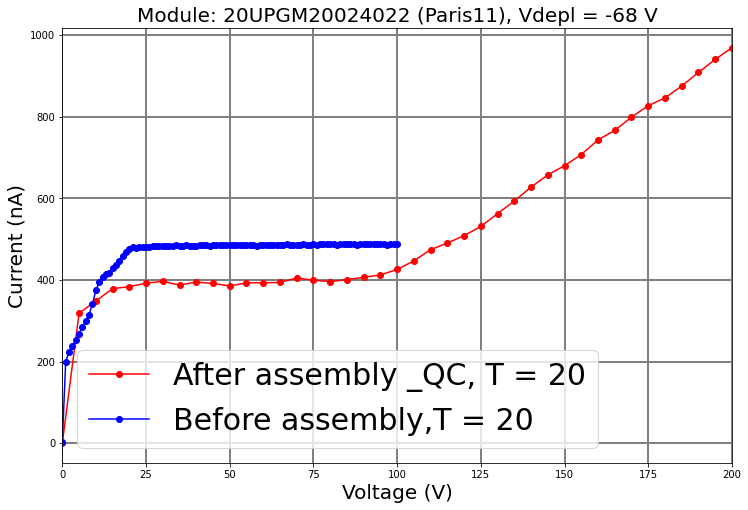

CEA_tests/20UPGM20021148/Test_SensorIV_qc.csv
afterlife: 3377-6-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-6-Q5(1) _ 6_15_2021 10_59_06 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

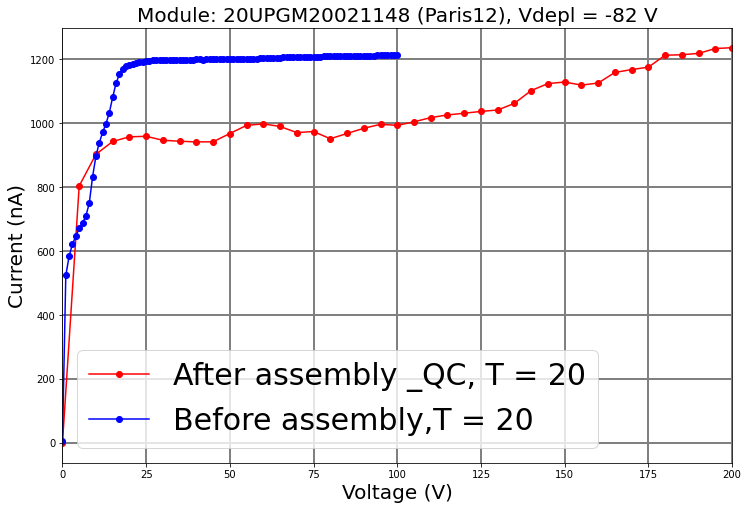

CEA_tests/20UPGM20021171/Test_SensorIV_qc.csv
afterlife: 3378-9-Q2
IJCLab_Measurements/ThinModules/3378-9-Q2_smu1P15_smu2BS_m1_auto_20210506.csv
temp 20.03


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

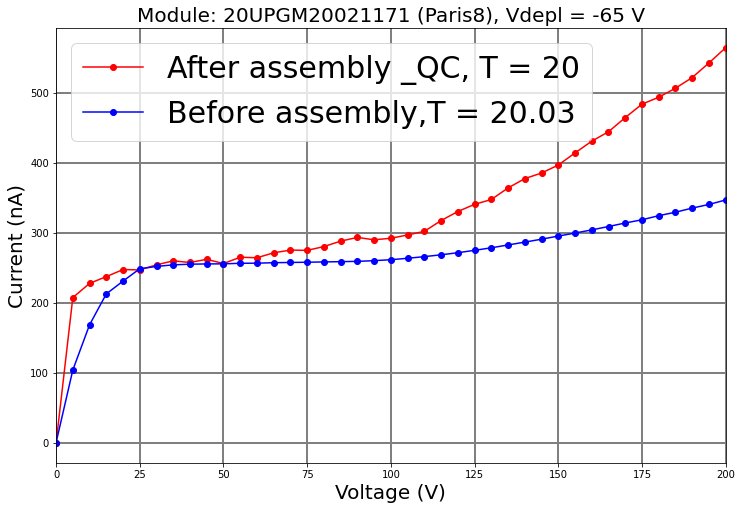

CEA_tests/20UPGM20025034/Test_SensorIV_qc.csv
afterlife: 3378-1-Q5
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3378-1-Q5(5) _ 6_15_2021 10_48_22 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

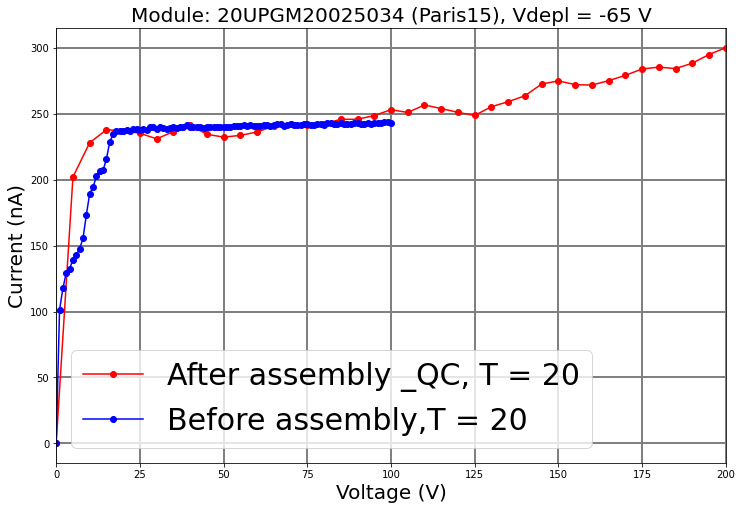

CEA_tests/20UPGM20121146/Test_SensorIV_qc.csv
afterlife: bare_module_5
IJCLab_Measurements/ThickModules/ijclab_bare_module_5_20210326.csv
CEA_tests/20UPGM20025035/Test_SensorIV_qc.csv
afterlife: 3377-7-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch8_3377-7-Q2(1) _ 6_15_2021 11_07_11 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

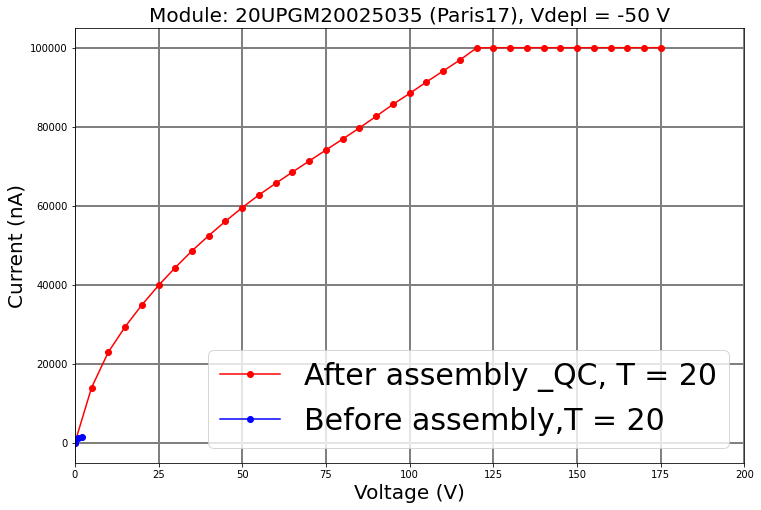

CEA_tests/20UPGM20025045/Test_SensorIV_qc.csv
afterlife: 3377-9-Q3
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q3(4) _ 4_28_2021 11_22_18 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

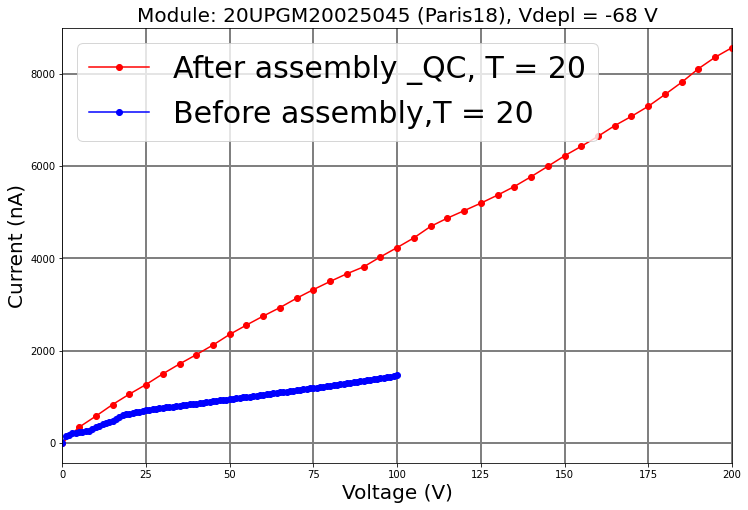

CEA_tests/20UPGM20124016/Test_SensorIV_qc.csv
afterlife: bare_module_6
IJCLab_Measurements/ThickModules/ijclab_bare_module_6_20210326.csv
CEA_tests/20UPGM20021043/Test_SensorIV_qc.csv
afterlife: 3378-2-Q3
IJCLab_Measurements/ThinModules/3378-2-Q3_smu1P15_smu2BS_m1_1uA_20210518.csv
CEA_tests/20UPGM20024020/Test_SensorIV_qc.csv
afterlife: 3377-9-Q2
Unguarded I_V Sweep with chuck at GND [Quad_Batch7_3377-9-Q2(3) _ 4_28_2021 11_16_40 AM].csv
temp 20


/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IV_after["Current (A)"] = IV_after["current"]*(-10**9)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(IV_after["Voltage (V)"].abs(),IV_after["Current (A)"].abs(),'-ok',label=f"After assembly {qc}, T = {after_temperature}",color="r",)
/var/folders/pf/3fsc9fg93yd7mwbw_fnc6q5h0000gp/T/ipykernel_56812/1810342929.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> co

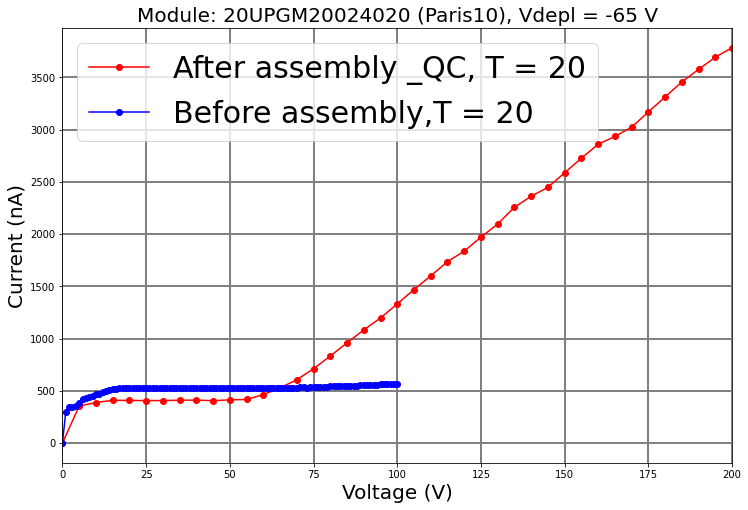

CEA_tests/20UPGM20024044/Test_SensorIV_qc.csv
afterlife: 3377-7-Q3
IJCLab_Measurements/ThinModules/3377-7-Q3_smu1P15_smu2BS_m2_1uA_20210511.csv


In [51]:
import os.path
from os import path

for dirs in os.listdir("CEA_tests"):
    if "UPGM" in dirs:
  #     if "20UPGM20024025" not in dirs:
  #          continue
        post_assembly = "CEA_tests/"+dirs+"/Test_SensorIV_qc.csv"
        before_assembly = ""
        print (post_assembly)
        print("afterlife:",module_dict[dirs])
        file_type = "ijclab"
   #     plotIV_CEA(post_assembly,module_dict[dirs])

        if module_dict[dirs] in dict_lpnhe:
            print (dict_lpnhe[module_dict[dirs]])
            before_assembly = dict_lpnhe[module_dict[dirs]]
            file_type = "lpnhe"
        elif module_dict[dirs] in dict_ijclab:
            file_type = "ijclab"
            before_assembly = dict_ijclab[module_dict[dirs]]
            print (dict_ijclab[module_dict[dirs]])
        elif module_dict[dirs] in dict_thick_mod:
            print (dict_thick_mod[module_dict[dirs]])
            before_assembly = dict_thick_mod[module_dict[dirs]]
            file_type = "thick"
        
        if path.exists(post_assembly):
            plotIV_combined(before_assembly,post_assembly,file_type,dirs,"_QC")



In [44]:
dict_ijclab = {} 

files = glob.glob ("IJCLab_Measurements/ThickModules/*.csv") 
start_key = "33"
end_key = "-Q"
module_names = []

for f in files:
    start = f.find(start_key)
    end = f.find(end_key)
    module_name = f[start:end+3]
    dict_ijclab[module_name] = f
    copies = 0
    while module_name in module_names:
        copies +=1
        if copies > 1:
            module_name = module_name[:-2]+f"_{copies}"
        else:
            module_name = module_name+f"_{copies}"
    module_names.append(module_name)
    print(module_name)
    plotIV_ijclab(f, module_name)


temp 20.03
hum 7.842546


KeyError: "None of [Index(['D(X)', 'E(Y1)'], dtype='object')] are in the [columns]"

In [ ]:
dict_lpnhe = {} 
files = glob.glob ("*.csv") 
pattern = "Q(.*?)."
start_key = "Quad"
end_key = "-Q"
module_names = []
# In[18]:
#print (files)
files = files
for f in files:
    start = f.find(start_key)
    end = f.find(end_key)
    module_name = f[start+12:end+3]
    dict_lpnhe[module_name] = f

    copies = 0
    while module_name in module_names:
        copies +=1
        if copies > 1:
            module_name = module_name[:-2]+f"_{copies}"
        else:
            module_name = module_name+f"_{copies}"
    module_names.append(module_name)
    module_data = pd.read_csv(f"./{f}", encoding="latin", names=["parameter","detail","d0","d1","d2","d3"])
    print (f)
    #plotIV(module_data,module_name)

In [ ]:
dict_ijclab = {} 

files = glob.glob ("IJCLab_Measurements/ThickModules/*.csv") 
start_key = ""
end_key = ""
module_names = []

for f in files:
    print(f)
    start = f.find(start_key)
    end = f.find(end_key)
    module_name = f[start:end+3]
    dict_ijclab[module_name] = f
    copies = 0
    while module_name in module_names:
        copies +=1
        if copies > 1:
            module_name = module_name[:-2]+f"_{copies}"
        else:
            module_name = module_name+f"_{copies}"
    module_names.append(module_name)
    print(module_name)
    plotIV_thick(f, module_name)